# Naive Bayes: Sentiment Classifier

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load and process amazon data
data_path = ('/Users/Lisa/Thinkful_Data_Science_Projects/Module 17/sentiment labelled sentences/amazon_cells_labelled.txt')

amazon = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon.columns = ['message', 'positive']

In [3]:
# Check data
amazon.head()

,message,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
# Add feature columns to data frame
pos_keywords = ['great', 'good', 'excellent', 'nice', 'ideal', 'well', 'impress' ,'must',
            'recommend', 'best', 'want', 'reasonable', 'happy', 'no complaints', 'cool',
            'beautiful', 'easy', 'bargain', 'fast']

for key in pos_keywords:
    amazon[str(key)] = amazon.message.str.contains(
        str(key),
        case=False
    )
    
neg_keywords = ['bad', 'terrible', 'waste', 'problem', "doesn't", 'unusable', 'garbage',
               'poor', 'worthless', 'return', 'disappoint', 'drawback', 'do not buy', 'beware',
               'not', 'broke', 'flaw', 'hate', 'useless', 'worst', 'junk', 'mistake', 'warning']

for key in neg_keywords:
    amazon[str(key)] = amazon.message.str.contains(
        str(key),
        case=False
    )

In [5]:
amazon.head()

,message,positive,great,good,excellent,nice,ideal,well,impress,must,...,beware,not,broke,flaw,hate,useless,worst,junk,mistake,warning
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Turn positive column into a boolean so we can do some statistics
# to prepare for modeling
amazon['positive'] = (amazon['positive'] == 1)
# Note that if you run this cell a second time everything will
# become false, so don't

In [7]:
amazon.head()

,message,positive,great,good,excellent,nice,ideal,well,impress,must,...,beware,not,broke,flaw,hate,useless,worst,junk,mistake,warning
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


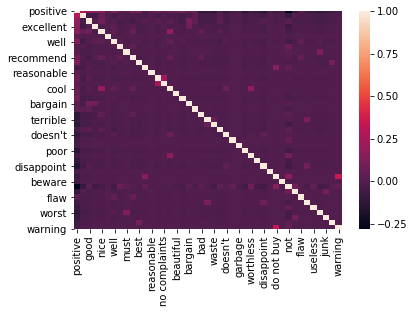

In [8]:
# Look at correlation matrix
sns.heatmap(amazon.corr())

In [9]:
# Specify inputs (x or independent variables) and outputs (y or dependent variable)
data = amazon[pos_keywords + neg_keywords]
target = amazon['positive']

In [11]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable
bnb = BernoulliNB()

# Fit our model to the data
bnb.fit(data, target)

# Classify, storing the result in a new variable
y_pred = bnb.predict(data)

# Display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points: 238


Number of mislabeled points out of a total 1000 points: 318


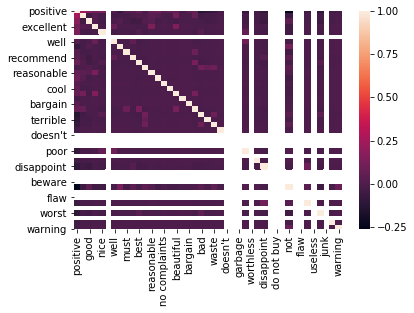

In [13]:
# Test amazon model on yelp reviews
# Load and process yelp data
data_path = ('/Users/Lisa/Thinkful_Data_Science_Projects/Module 17/sentiment labelled sentences/yelp_labelled.txt')

yelp = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp.columns = ['message', 'positive']

# Add feature columns to data frame
pos_keywords = ['great', 'good', 'excellent', 'nice', 'ideal', 'well', 'impress' ,'must',
            'recommend', 'best', 'want', 'reasonable', 'happy', 'no complaints', 'cool',
            'beautiful', 'easy', 'bargain', 'fast']

for key in pos_keywords:
    yelp[str(key)] = yelp.message.str.contains(
        str(key),
        case=False
    )
    
neg_keywords = ['bad', 'terrible', 'waste', 'problem', "doesn't", 'unusable', 'garbage',
               'poor', 'worthless', 'return', 'disappoint', 'drawback', 'do not buy', 'beware',
               'not', 'broke', 'flaw', 'hate', 'useless', 'worst', 'junk', 'mistake', 'warning']

for key in neg_keywords:
    yelp[str(key)] = yelp.message.str.contains(
        str(key),
        case=False
    )

# Turn positive column into a boolean so we can do some statistics
# to prepare for modeling
yelp['positive'] = (yelp['positive'] == 1)

# Look at correlation matrix
sns.heatmap(yelp.corr())

# Specify inputs (x or independent variables) and outputs (y or dependent variable)
data = yelp[pos_keywords + neg_keywords]
target = yelp['positive']

# Our data is binary / boolean, so we're importing the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable
bnb = BernoulliNB()

# Fit our model to the data
bnb.fit(data, target)

# Classify, storing the result in a new variable
y_pred = bnb.predict(data)

# Display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
))

The classifer translated from amazon reviews to yelp reviews pretty well (76% correct down to only 68.2% correct). There is obviously room for improvement in both scenarios, but the model translated better than I thought it would.

I manually skimmed the reviews/messages in the amazon_cells_labelled.txt file and looked for commonly used positive and negative words to use as features. I then used these features to create a bernoulli naive bayes classification model. To optimize the model, I manually added and removed keywords to decrease the number of mislabeled points. I initially began with only positive keywords, but was able to greatly improve the model by adding negative keywords as well.